In [1]:
!wget https://www.dropbox.com/s/z8hjehzs77lgdzn/Part1_P5.csv?dl=0

--2019-09-20 22:47:37--  https://www.dropbox.com/s/z8hjehzs77lgdzn/Part1_P5.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/z8hjehzs77lgdzn/Part1_P5.csv [following]
--2019-09-20 22:47:38--  https://www.dropbox.com/s/raw/z8hjehzs77lgdzn/Part1_P5.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b69fff8e9407a70c4e8a252fa.dl.dropboxusercontent.com/cd/0/inline/Ao9c9LftWgq7bde9eIsfI3fY2pG8z9RMVJ2y4GKjI_A06MwYDsjQdOlOAMoceN7shEeYpR74kKoWkxojFmKIBsWQ4ryAu8d3yTVa9RumZxrWsw/file# [following]
--2019-09-20 22:47:38--  https://uc0b69fff8e9407a70c4e8a252fa.dl.dropboxusercontent.com/cd/0/inline/Ao9c9LftWgq7bde9eIsfI3fY2pG8z9RMVJ2y4GKjI_A06MwYDsjQdOlOAMoceN7shEeYpR74kKoWkxojFmKIBsWQ4ryAu8d3yTVa9RumZxrWsw/file
Resolving uc0b

In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

df_customers = pd.read_csv('Part1_P5.csv?dl=0')
df_customers.head(50)


,Count_Invoices,Average_Products_Invoice,Average_Quantity_Invoice,Average_TotaPrice_Invoice,United Kingdom,Decoration Department,Toys & Kids Deprtment,Kitchen Department,Handcraft & Clothes Department,Design & Viantage_Decoration Department,Last_Date,First_Date,Average_Sin_Time,Average_Cos_Time,Customer_Category_km13,Customer_Category_km4,Customer_Category_dbsc5,Customer_Category_dbsc30
0,7.0,26.000000,351.142857,615.714286,0.0,0.159341,0.274725,0.076923,0.302198,0.186813,371.0,6.0,-0.204487,-0.978869,2.0,3.0,0,0
1,4.0,7.750000,585.250000,449.310000,0.0,0.032258,0.129032,0.258065,0.548387,0.032258,298.0,15.0,-0.807608,-0.589719,2.0,3.0,-1,0
2,1.0,73.000000,631.000000,1757.550000,0.0,0.246575,0.178082,0.205479,0.232877,0.136986,355.0,355.0,0.533615,-0.845728,2.0,3.0,0,0
3,1.0,17.000000,197.000000,334.400000,0.0,0.117647,0.235294,0.117647,0.294118,0.235294,63.0,63.0,-0.868199,-0.496217,2.0,3.0,0,0
4,8.0,10.625000,67.000000,313.255000,0.0,0.223529,0.058824,0.200000,0.329412,0.188235,337.0,77.0,-0.633262,-0.773938,2.0,3.0,0,0
5,1.0,4.000000,20.000000,89.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,169.0,169.0,-0.998392,-0.056693,6.0,0.0,-1,-1
6,1.0,58.000000,530.000000,1079.400000,0.0,0.137931,0.448276,0.103448,0.068966,0.241379,141.0,141.0,-0.304864,-0.952396,2.0,3.0,-1,0
7,1.0,13.000000,240.000000,459.400000,0.0,0.000000,0.153846,0.461538,0.384615,0.000000,159.0,159.0,-0.457874,-0.889017,2.0,3.0,0,0
8,3.0,19.666667,530.333333,937.143333,0.0,0.186441,0.186441,0.203390,0.372881,0.050847,351.0,48.0,0.318777,-0.947830,2.0,3.0,0,0
9,1.0,131.000000,2708.000000,6207.670000,0.0,0.152672,0.320611,0.206107,0.213740,0.106870,340.0,340.0,-0.880891,-0.473320,9.0,3.0,-1,-1


In [0]:
# Sampling dataset
# Case of classification with kmeans (clusters=13)

X_features =  df_customers.as_matrix(df_customers.columns[0:13])
y_target_km13 = df_customers.as_matrix([df_customers.columns[14]])

X_km13, X_test_km13, y_km13, y_test_km13 = train_test_split(X_features, y_target_km13, train_size=0.75,
                                                    test_size=0.25, random_state=40)

In [0]:
# Sampling dataset
# Case of classification with kmeans (clusters=4)

y_target_km4 = df_customers.as_matrix([df_customers.columns[15]])

X_km4, X_test_km4, y_km4, y_test_km4 = train_test_split(X_features, y_target_km4, train_size=0.75,
                                                    test_size=0.25, random_state=40)

In [0]:
# Sampling dataset
# Case of classification with dbscan (min_samples=5 et eps=2.3)

y_target_dbsc5 = df_customers.as_matrix([df_customers.columns[16]])

X_dbsc5, X_test_dbsc5, y_dbsc5, y_test_dbsc5 = train_test_split(
    X_features, y_target_dbsc5, train_size=0.75, test_size=0.25, random_state=40)

In [0]:
# Sampling dataset
# Case of classification with dbscan (min_samples=30 et eps=3)

y_target_dbsc30 = df_customers.as_matrix([df_customers.columns[17]])

X_dbsc30, X_test_dbsc30, y_dbsc30, y_test_dbsc30 = train_test_split(
    X_features, y_target_dbsc30, train_size=0.75, test_size=0.25, random_state=40)

# RFC models

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5}
accuracy score : 0.9022


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa670c9f828>,
      dtype=object)

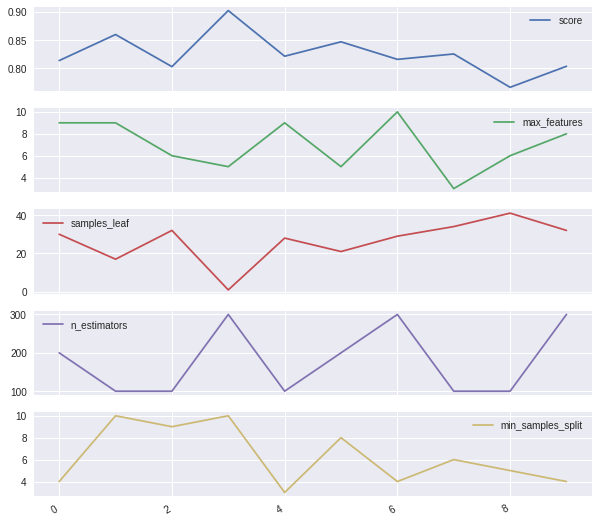

In [0]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_km13)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
rfc_rs.fit(X_km13, y_km13.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs, X=X_km13, y=y_km13.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs.cv_results_['mean_test_score'],
                                     rfc_rs.cv_results_['param_max_features'].data,
                                     rfc_rs.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs.cv_results_['param_n_estimators'].data,
                                     rfc_rs.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 8}
accuracy score : 0.9443


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd474d6128>,
      dtype=object)

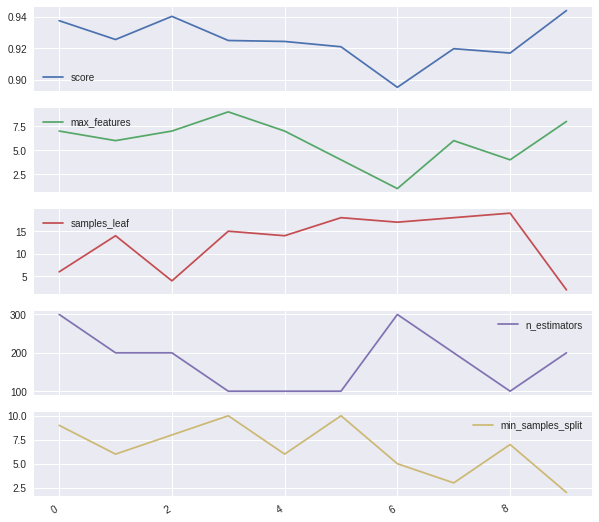

In [0]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_km4)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 20, 20, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_km4 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                                random_state=40, n_iter=10)
rfc_rs_km4.fit(X_km4, y_km4.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_km4, X=X_km4, y=y_km4.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs_km4.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs_km4.cv_results_['mean_test_score'],
                                     rfc_rs_km4.cv_results_['param_max_features'].data,
                                     rfc_rs_km4.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs_km4.cv_results_['param_n_estimators'].data,
                                     rfc_rs_km4.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 8}
accuracy score : 0.9717


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd47495908>,
      dtype=object)

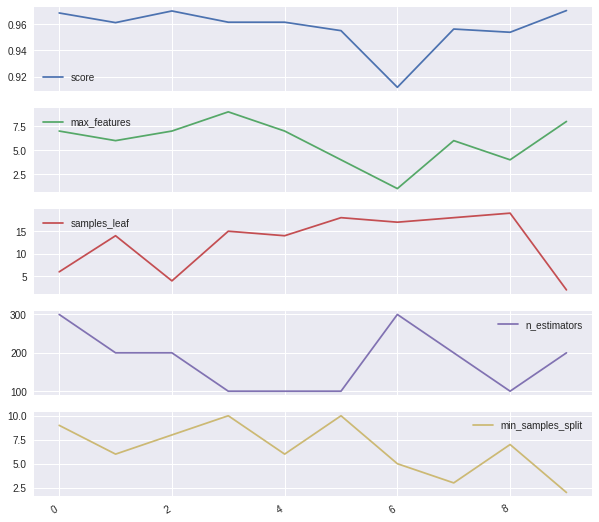

In [0]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_dbsc5)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 20, 20, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_dbsc5 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                                  n_iter=10, random_state=40)
rfc_rs_dbsc5.fit(X_dbsc5, y_dbsc5.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_dbsc5, X=X_dbsc5, y=y_dbsc5.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs_dbsc5.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs_dbsc5.cv_results_['mean_test_score'],
                                     rfc_rs_dbsc5.cv_results_['param_max_features'].data,
                                     rfc_rs_dbsc5.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs_dbsc5.cv_results_['param_n_estimators'].data,
                                     rfc_rs_dbsc5.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 8}
accuracy score : 0.9852


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd478b4e10>,
      dtype=object)

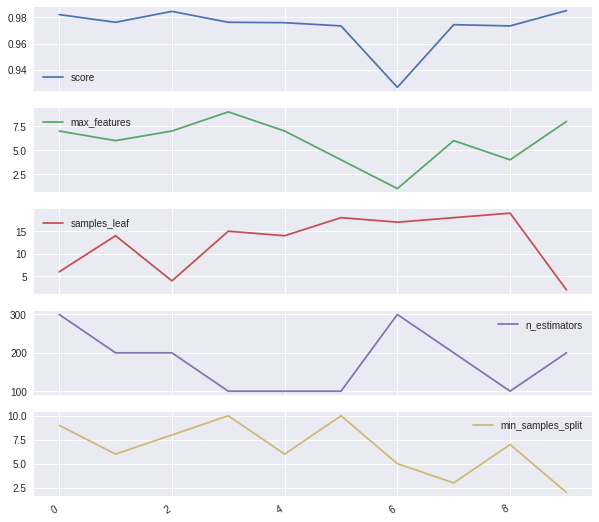

In [0]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_dbsc30)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 20, 20, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_dbsc30 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                                   random_state=40, n_iter=10)
rfc_rs_dbsc30.fit(X_dbsc30, y_dbsc30.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_dbsc30, X=X_dbsc30, y=y_dbsc30.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs_dbsc30.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs_dbsc30.cv_results_['mean_test_score'],
                                     rfc_rs_dbsc30.cv_results_['param_max_features'].data,
                                     rfc_rs_dbsc30.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs_dbsc30.cv_results_['param_n_estimators'].data,
                                     rfc_rs_dbsc30.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

In [0]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Reds):
    ''' This function prints and plots a normalized confusion matrix.
  
  Parameters:
      
      cm : the confusion matix 
      classes (list): the labels to diplay on the graph
      title (string): the title of the confusion matrix plot
      
  '''

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, bbox={"pad":3, 'alpha': 0.5,"facecolor":'red'}, size=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

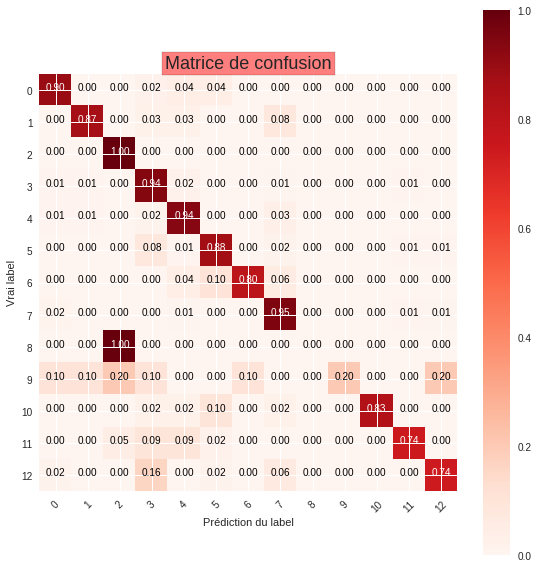

In [0]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_km13)

y_pred = rfc_rs.predict(X_test_km13)
cnf_matrix = confusion_matrix(y_test_km13, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

# Bad predictions (20%) for the cluster n°9 (containing only 33 elements)
# No accurate predictions for the cluster n°8 (containing only 7 elements)

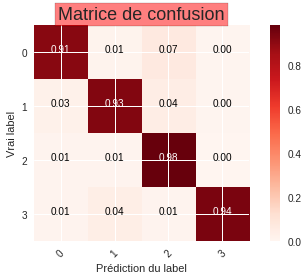

In [0]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_km4)

y_pred_km4 = rfc_rs_km4.predict(X_test_km4)
cnf_matrix = confusion_matrix(y_test_km4, y_pred_km4)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(4)],
                      title='Confusion matrix')

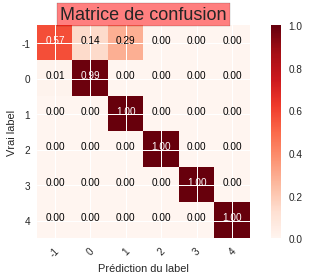

In [0]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_dbsc5)

y_pred_dbsc5 = rfc_rs_dbsc5.predict(X_test_dbsc5)
cnf_matrix = confusion_matrix(y_test_dbsc5, y_pred_dbsc5)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

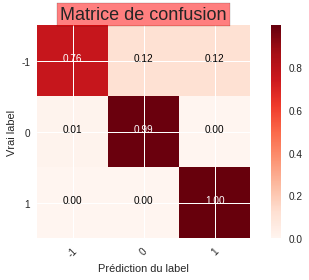

In [0]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_dbsc30)

y_pred_dbsc30 = rfc_rs_dbsc30.predict(X_test_dbsc30)
cnf_matrix = confusion_matrix(y_test_dbsc30, y_pred_dbsc30)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 2)],
                      title='Confusion matrix')

# Gradient Boosting models

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 32, 'max_features': 5, 'learning_rate': 0.1}
accuracy score : 0.9280


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66cd36470>,
      dtype=object)

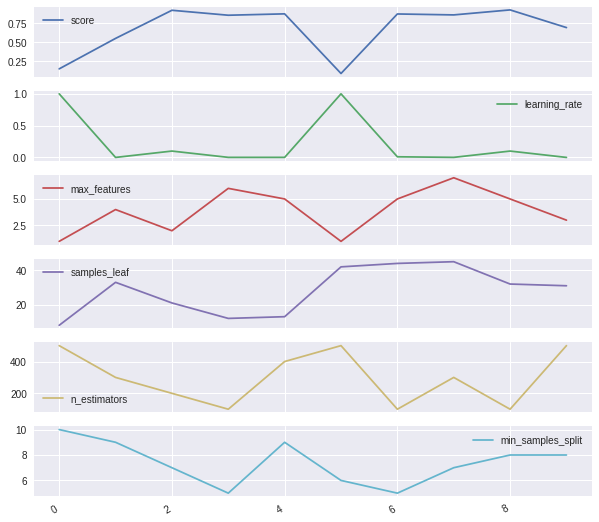

In [0]:
# Gradient Boosting (target variable: Customer_Category_km13)

gbc = GradientBoostingClassifier(random_state=40)
param_grid = {'learning_rate': np.logspace(-5,  0,  6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "max_features": np.linspace(1, 10, 10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int)}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
gbc_rs = RandomizedSearchCV(gbc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
gbc_rs.fit(X_km13, y_km13.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(gbc_rs, X=X_km13, y=y_km13.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      gbc_rs.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

gbc_rs_df=pd.DataFrame(np.transpose([gbc_rs.cv_results_['mean_test_score'],
                                     gbc_rs.cv_results_['param_learning_rate'].data,
                                     gbc_rs.cv_results_['param_max_features'].data,
                                     gbc_rs.cv_results_['param_min_samples_leaf'].data,
                                     gbc_rs.cv_results_['param_n_estimators'].data,
                                     gbc_rs.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'learning_rate', 'max_features',
                                    'samples_leaf', 'n_estimators', 
                                    'min_samples_split'])
gbc_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 10, 'learning_rate': 1.0}
accuracy score : 0.9551


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66cd65c88>,
      dtype=object)

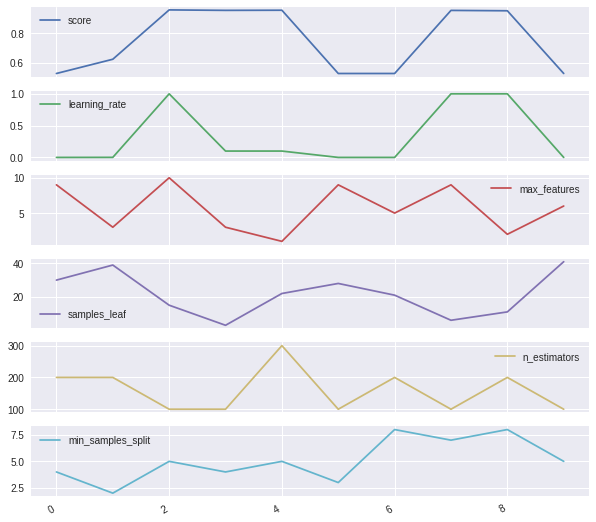

In [0]:
# Gradient Boosting (target variable: Customer_Category_km4)

gbc = GradientBoostingClassifier(random_state=40)
param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "max_features": np.linspace(1, 10, 10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int)}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
gbc_rs_km4 = RandomizedSearchCV(gbc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
gbc_rs_km4.fit(X_km4, y_km4.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(gbc_rs_km4, X=X_km4, y=y_km4.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      gbc_rs_km4.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

gbc_rs_df=pd.DataFrame(np.transpose([gbc_rs_km4.cv_results_['mean_test_score'],
                                     gbc_rs_km4.cv_results_['param_learning_rate'].data,
                                     gbc_rs_km4.cv_results_['param_max_features'].data,
                                     gbc_rs_km4.cv_results_['param_min_samples_leaf'].data,
                                     gbc_rs_km4.cv_results_['param_n_estimators'].data,
                                     gbc_rs_km4.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'learning_rate', 'max_features',
                                    'samples_leaf', 'n_estimators', 
                                    'min_samples_split'])
gbc_rs_df.plot(subplots=True,figsize=(10, 10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The def

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 3, 'learning_rate': 0.1}
accuracy score : 0.9745


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66c6efda0>,
      dtype=object)

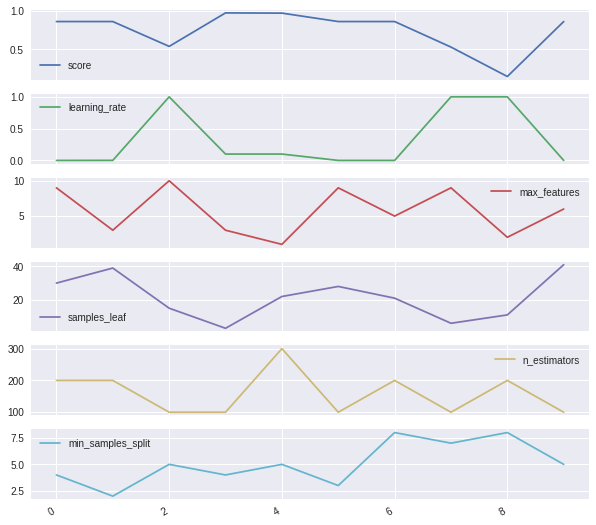

In [0]:
# Gradient Boosting (target variable: Customer_Category_dbsc5)

gbc = GradientBoostingClassifier(random_state=40)
param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3, dtype = int),
              "max_features": np.linspace(1, 10, 10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int)}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
gbc_rs_dbsc5 = RandomizedSearchCV(gbc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
gbc_rs_dbsc5.fit(X_dbsc5, y_dbsc5.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(gbc_rs_dbsc5, X=X_dbsc5, y=y_dbsc5.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      gbc_rs_dbsc5.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

gbc_rs_df=pd.DataFrame(np.transpose([gbc_rs_dbsc5.cv_results_['mean_test_score'],
                                     gbc_rs_dbsc5.cv_results_['param_learning_rate'].data,
                                     gbc_rs_dbsc5.cv_results_['param_max_features'].data,
                                     gbc_rs_dbsc5.cv_results_['param_min_samples_leaf'].data,
                                     gbc_rs_dbsc5.cv_results_['param_n_estimators'].data,
                                     gbc_rs_dbsc5.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'learning_rate', 'max_features',
                                    'samples_leaf', 'n_estimators', 
                                    'min_samples_split'])
gbc_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 3, 'learning_rate': 0.1}
accuracy score : 0.9859


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66c48ef98>,
      dtype=object)

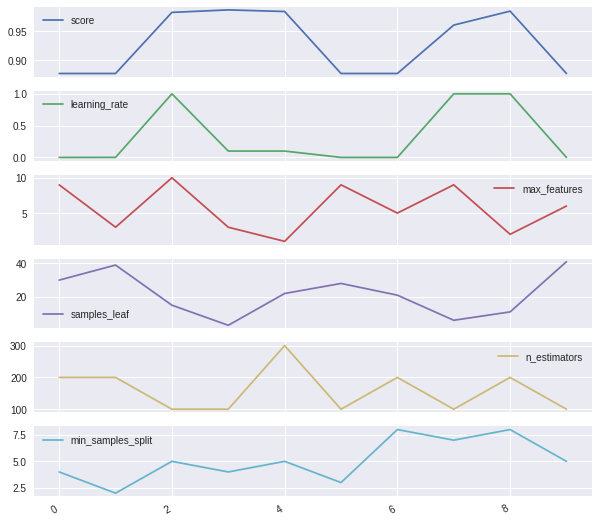

In [0]:
# Gradient Boosting (target variable: Customer_Category_dbsc30)

gbc = GradientBoostingClassifier(random_state=40)
param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "max_features": np.linspace(1, 10, 10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int)}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
gbc_rs_dbsc30 = RandomizedSearchCV(gbc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
gbc_rs_dbsc30.fit(X_dbsc30, y_dbsc30.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(gbc_rs_dbsc30, X=X_dbsc30, y=y_dbsc30.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      gbc_rs_dbsc30.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

gbc_rs_df=pd.DataFrame(np.transpose([gbc_rs_dbsc30.cv_results_['mean_test_score'],
                                     gbc_rs_dbsc30.cv_results_['param_learning_rate'].data,
                                     gbc_rs_dbsc30.cv_results_['param_max_features'].data,
                                     gbc_rs_dbsc30.cv_results_['param_min_samples_leaf'].data,
                                     gbc_rs_dbsc30.cv_results_['param_n_estimators'].data,
                                     gbc_rs_dbsc30.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'learning_rate', 'max_features',
                                    'samples_leaf', 'n_estimators', 
                                    'min_samples_split'])
gbc_rs_df.plot(subplots=True,figsize=(10, 10))

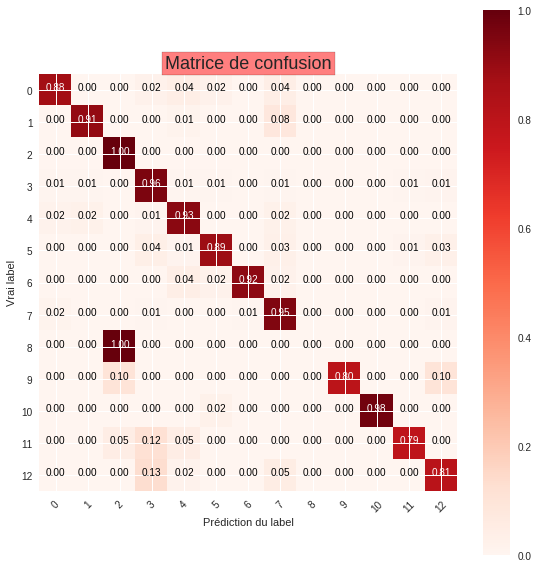

In [0]:
# Confusion matrix of the Gradient Boosting classifier model
# (target variable: Customer_Category_km13)

y_pred = gbc_rs.predict(X_test_km13)
cnf_matrix = confusion_matrix(y_test_km13, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

# No accurate predictions for the cluster n°8 (containing only 7 elements)

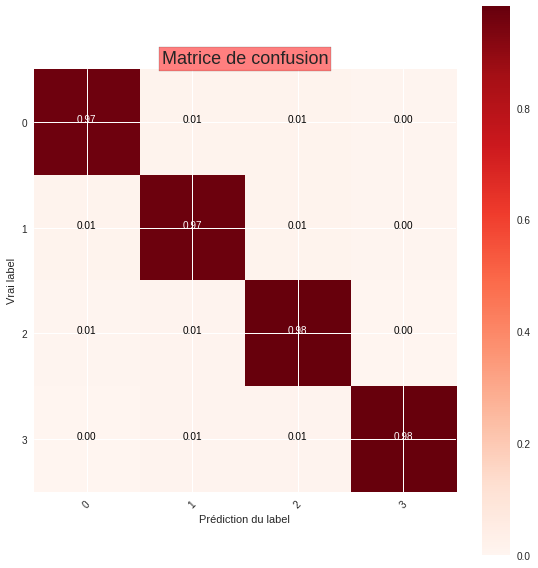

In [0]:
# Confusion matrix of the Gradient Boosting classifier model
# (target variable: Customer_Category_km4)

y_pred_km4 = gbc_rs_km4.predict(X_test_km4)
cnf_matrix = confusion_matrix(y_test_km4, y_pred_km4)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(4)],
                      title='Confusion matrix')

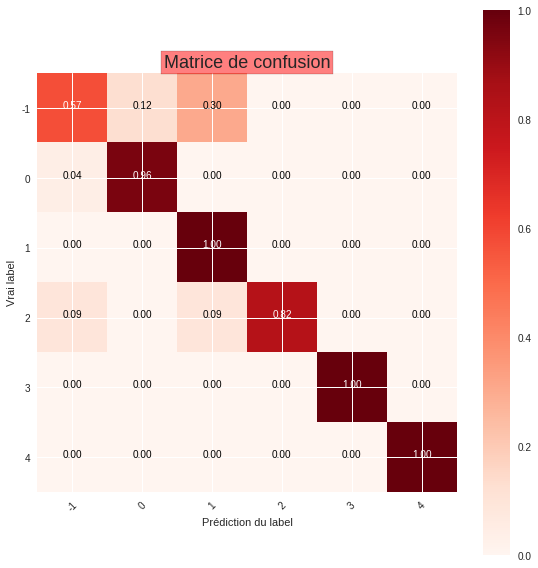

In [0]:
# Confusion matrix of the Gradient Boosting classifier model
# (target variable: Customer_Category_dbsc5)

y_pred_dbsc5 = gbc_rs_dbsc5.predict(X_test_dbsc5)
cnf_matrix = confusion_matrix(y_test_dbsc5, y_pred_dbsc5)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix)

# Medium-quality prediction (57%) for the cluster n°-1 (containing 217 elements)

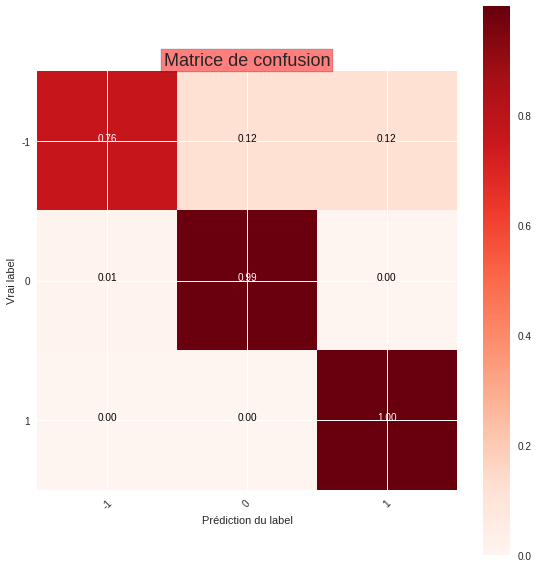

In [0]:
# Confusion matrix of the Gradient Boosting classifier model
# (target variable: Customer_Category_dbsc30)

y_pred_dbsc30 = gbc_rs_dbsc30.predict(X_test_dbsc30)
cnf_matrix = confusion_matrix(y_test_dbsc30, y_pred_dbsc30)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 2)],
                      title='Confusion matrix')

# XGBoosting models

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 1.0, 'colsample_bytree': 0.6}
accuracy score : 0.9262


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35ab187f60>,
      dtype=object)

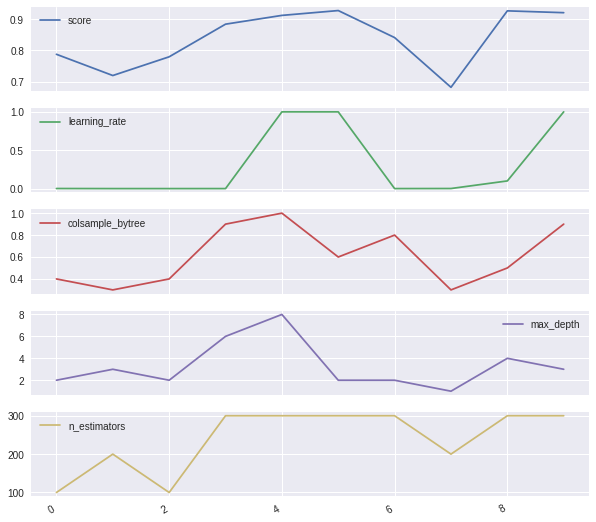

In [0]:
# XGBoosting (target variable: Customer_Category_km13)

param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "colsample_bytree": np.linspace(0.3, 1, 8),
              "max_depth" : np.linspace(1, 10, 9, dtype=int)}
xgb_model = xgb.XGBClassifier()

inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
xgb_rs_km13 = RandomizedSearchCV(xgb_model, param_grid, cv=inner_cv, n_iter=10, 
                        scoring="accuracy", random_state=40)
xgb_rs_km13.fit(X_km13, y_km13.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(xgb_rs_km13, X=X_km13, y=y_km13.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      xgb_rs_km13.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

xgb_rs_df=pd.DataFrame(np.transpose([xgb_rs_km13.cv_results_['mean_test_score'],
                                     xgb_rs_km13.cv_results_['param_learning_rate'].data,
                                     xgb_rs_km13.cv_results_['param_colsample_bytree'].data,
                                     xgb_rs_km13.cv_results_['param_max_depth'].data,
                                     xgb_rs_km13.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'colsample_bytree',
                                    'max_depth', 'n_estimators'])
xgb_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 1.0, 'colsample_bytree': 0.6}
accuracy score : 0.9582


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35a8f6b518>,
      dtype=object)

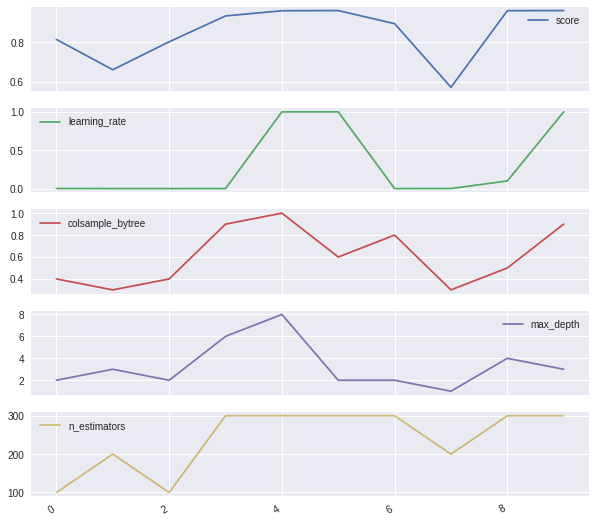

In [0]:
# XGBoosting (target variable: Customer_Category_km4)

param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "colsample_bytree": np.linspace(0.3, 1, 8),
              "max_depth" : np.linspace(1, 10, 9, dtype=int)}
xgb_model = xgb.XGBClassifier()

inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
xgb_rs_km4 = RandomizedSearchCV(xgb_model, param_grid, cv=inner_cv, n_iter=10, 
                        scoring="accuracy", random_state=40)
xgb_rs_km4.fit(X_km4, y_km4.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(xgb_rs_km4, X=X_km4, y=y_km4.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      xgb_rs_km4.best_params_)
print("accuracy score : %.4f" % nested_score.mean())

xgb_rs_df=pd.DataFrame(np.transpose([xgb_rs_km4.cv_results_['mean_test_score'],
                                     xgb_rs_km4.cv_results_['param_learning_rate'].data,
                                     xgb_rs_km4.cv_results_['param_colsample_bytree'].data,
                                     xgb_rs_km4.cv_results_['param_max_depth'].data,
                                     xgb_rs_km4.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'colsample_bytree',
                                    'max_depth', 'n_estimators'])
xgb_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
accuracy score : 0.9739


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35a8d80f98>,
      dtype=object)

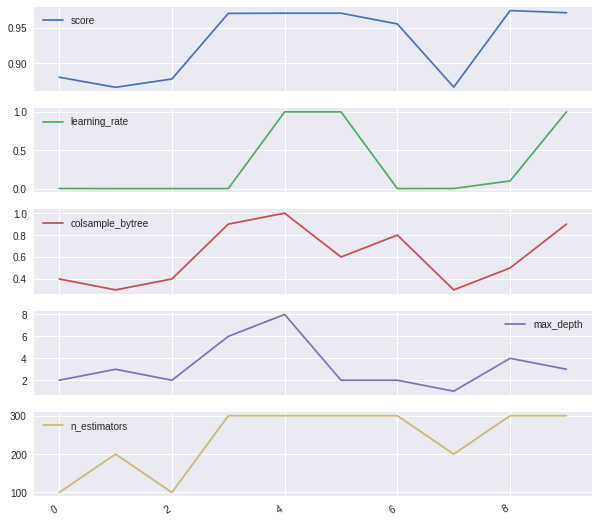

In [0]:
# XGBoosting (target variable: Customer_Category_dbsc5)

param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "colsample_bytree": np.linspace(0.3, 1, 8),
              "max_depth" : np.linspace(1, 10, 9, dtype=int)}
xgb_model = xgb.XGBClassifier()

inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
xgb_rs_dbsc5 = RandomizedSearchCV(xgb_model, param_grid, cv=inner_cv, n_iter=10, 
                        scoring="accuracy", random_state=40)
xgb_rs_dbsc5.fit(X_dbsc5, y_dbsc5.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(xgb_rs_dbsc5, X=X_dbsc5, y=y_dbsc5.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      xgb_rs_dbsc5.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    
xgb_rs_df=pd.DataFrame(np.transpose([xgb_rs_dbsc5.cv_results_['mean_test_score'],
                                     xgb_rs_dbsc5.cv_results_['param_learning_rate'].data,
                                     xgb_rs_dbsc5.cv_results_['param_colsample_bytree'].data,
                                     xgb_rs_dbsc5.cv_results_['param_max_depth'].data,
                                     xgb_rs_dbsc5.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'colsample_bytree',
                                    'max_depth', 'n_estimators'])
xgb_rs_df.plot(subplots=True,figsize=(10, 10))

Meilleurs hyperparamètres sur le jeu d'entraînement: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
accuracy score : 0.9855


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35a8ba1828>,
      dtype=object)

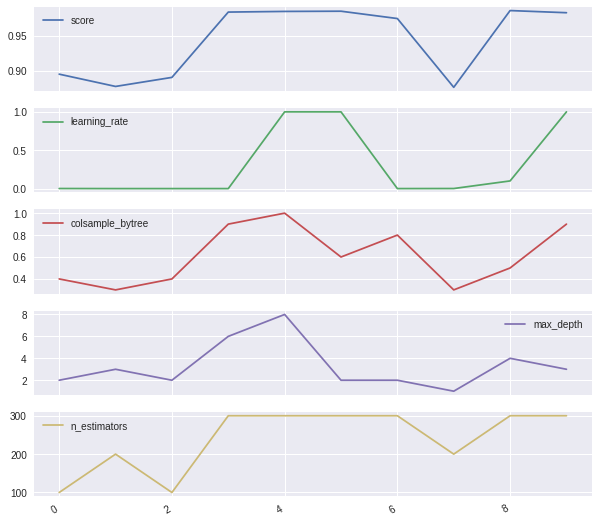

In [0]:
# XGBoosting (target variable: Customer_Category_dbsc30)

param_grid = {'learning_rate': np.logspace(-5, 0, 6),
              'n_estimators': np.linspace(100, 300, 3,dtype = int),
              "colsample_bytree": np.linspace(0.3, 1, 8),
              "max_depth" : np.linspace(1, 10, 9, dtype=int)}
xgb_model = xgb.XGBClassifier()

inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
xgb_rs_dbsc30 = RandomizedSearchCV(xgb_model, param_grid, cv=inner_cv, n_iter=10, 
                        scoring="accuracy", random_state=40)
xgb_rs_dbsc30.fit(X_dbsc30, y_dbsc30.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(xgb_rs_dbsc30, X=X_dbsc30, y=y_dbsc30.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      xgb_rs_dbsc30.best_params_)
print("accuracy score : %.4f" % nested_score.mean())

xgb_rs_df=pd.DataFrame(np.transpose([xgb_rs_dbsc30.cv_results_['mean_test_score'],
                                     xgb_rs_dbsc30.cv_results_['param_learning_rate'].data,
                                     xgb_rs_dbsc30.cv_results_['param_colsample_bytree'].data,
                                     xgb_rs_dbsc30.cv_results_['param_max_depth'].data,
                                     xgb_rs_dbsc30.cv_results_['param_n_estimators'].data]),
                           columns=['score', 'learning_rate', 'colsample_bytree',
                                    'max_depth', 'n_estimators'])
xgb_rs_df.plot(subplots=True,figsize=(10, 10))

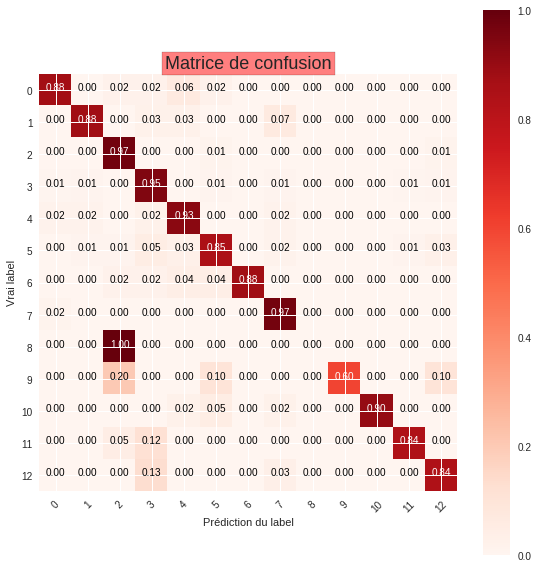

In [0]:
# Matrice de confusion pour le modèle de classifieur XGBoosting 
# (variable cible: Customer_Category_km13)

y_pred = xgb_rs_km13.predict(X_test_km13)
cnf_matrix = confusion_matrix(y_test_km13, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

# Medium-quality predicitions (60%) for the cluster n°9 (containg only 33 elements)
# No accurate predictions for the cluster n°8 (containing only 7 elements)

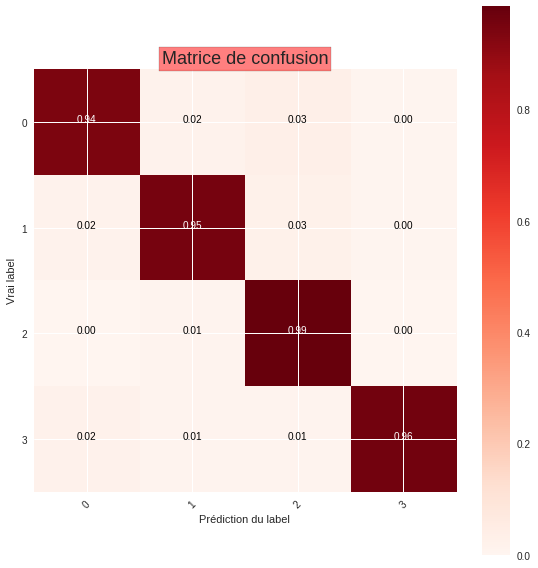

In [0]:
# Confusion matrix for the XGBoosting classifier model
# (target variable: Customer_Category_km4)

y_pred_km4 = xgb_rs_km4.predict(X_test_km4)
cnf_matrix = confusion_matrix(y_test_km4, y_pred_km4)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(4)],
                      title='Confusion matrix')

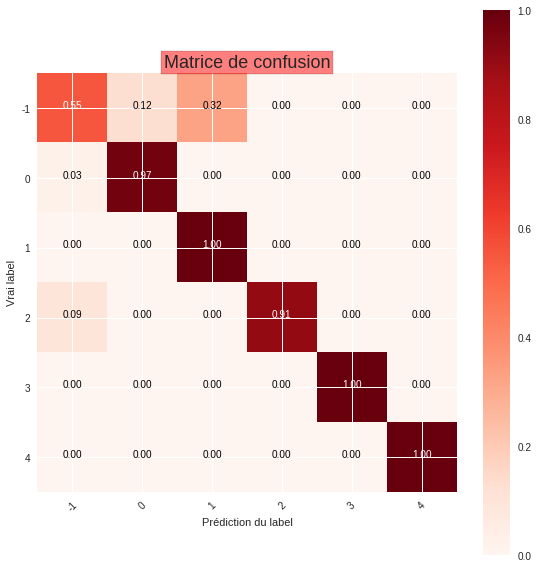

In [0]:
# Confusion matrix for the XGBoosting classifier model
# (target variable: Customer_Category_dbsc5)

y_pred_dbsc5 = xgb_rs_dbsc5.predict(X_test_dbsc5)
cnf_matrix = confusion_matrix(y_test_dbsc5, y_pred_dbsc5)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

# Medium-quality predictions (55%) for the cluster n°-1 (containing 217 elements)

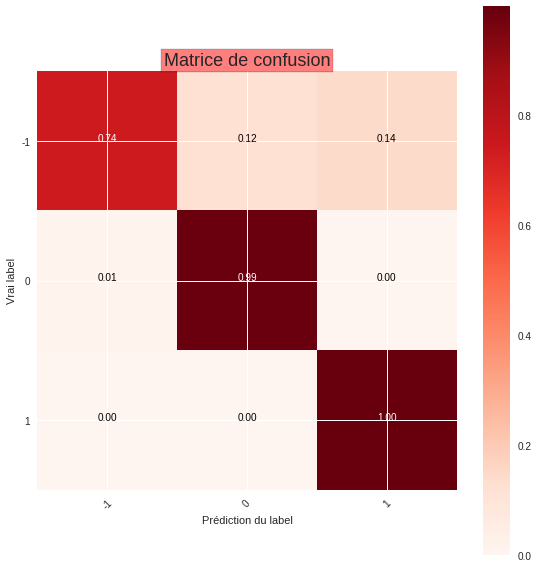

In [0]:
# Confusion matrix for the XGBoosting classifier model
# (target variable: Customer_Category_dbsc30)

y_pred_dbsc30 = xgb_rs_dbsc30.predict(X_test_dbsc30)
cnf_matrix = confusion_matrix(y_test_dbsc30, y_pred_dbsc30)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 2)],
                      title='Confusion matrix')

# Improving Gradient Boosting model (target variable: Customer_Category_km13 )

In [0]:
# Gradient Boosting (target variable: Customer_Category_km13 ) with medium upsampling

df_majority = df_customers[(df_customers.Customer_Category_km13!=8.0) &
                          (df_customers.Customer_Category_km13!=9.0)]
df_cluster8 = df_customers[df_customers.Customer_Category_km13==8.0]
df_cluster9 = df_customers[df_customers.Customer_Category_km13==9.0]
df_minority = pd.concat([df_cluster8, df_cluster9])
 
# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=334,
                                 random_state=40) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Validation set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_km13, y_km13, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled.as_matrix(df_upsampled.columns[0:13])
y = df_upsampled.as_matrix([df_upsampled.columns[14]])

# Training set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)


gbc = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=8,
                                 min_samples_leaf=32, max_features=5, learning_rate=0.1)
gbc.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)

print("accuracy score (with upsampling): %.4f" % accuracy)


accuracy score (with upsampling): 0.9846


accuracy score (with upsampling): 0.9923


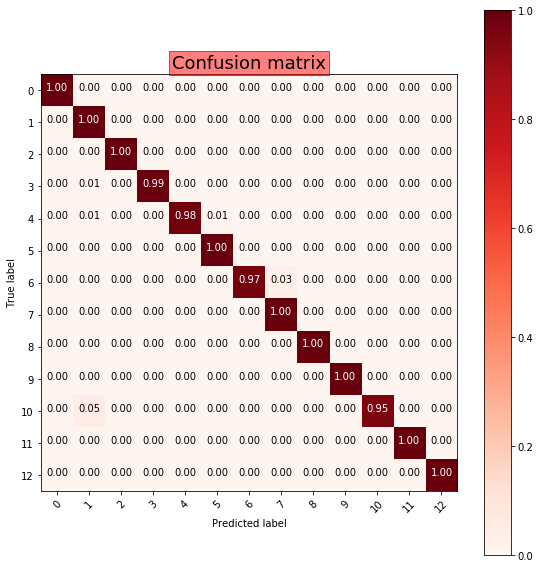

In [0]:
# Gradient Boosting (target variable: Customer_Category_km13 ) with hard upsampling 

df_majority = df_customers[(df_customers.Customer_Category_km13!=8.0) &
                          (df_customers.Customer_Category_km13!=9.0)]
df_cluster8 = df_customers[df_customers.Customer_Category_km13==8.0]
df_cluster9 = df_customers[df_customers.Customer_Category_km13==9.0]
df_minority = pd.concat([df_cluster8, df_cluster9])
 
# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=778,
                                 random_state=40)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Validation set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_km13, y_km13, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled.as_matrix(df_upsampled.columns[0:13])
y = df_upsampled.as_matrix([df_upsampled.columns[14]])

# Training set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)


gbc_ups_km13 = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=8,
                                 min_samples_leaf=32, max_features=5, learning_rate=0.1)
gbc_ups_km13.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc_ups_km13.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)
print("accuracy score (with upsampling): %.4f" % accuracy)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')


accuracy score (with upsampling): 0.9969


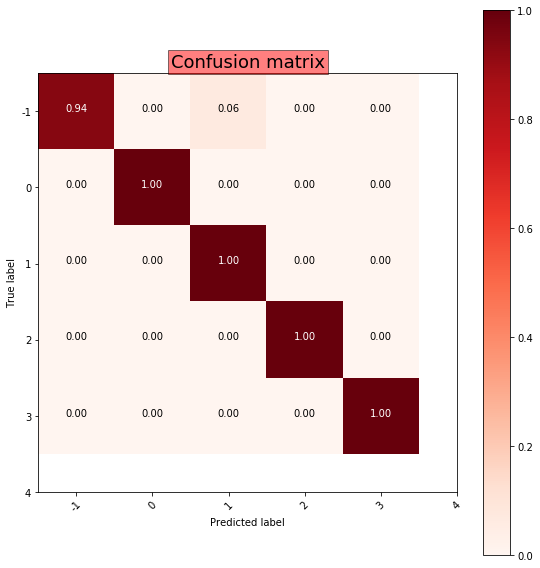

In [0]:
# Gradient Boosting (target variable: Customer_Category_dbsc5 ) with medium upsampling

df_majority = df_customers[(df_customers.Customer_Category_dbsc5!=-1.0)]
df_minority = df_customers[(df_customers.Customer_Category_dbsc5==-1.0)]
 
# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=651,   
                                 random_state=40)
 
# Combine majority class with upsampled minority class 
df_upsampled_km13 = pd.concat([df_majority, df_minority_upsampled])

# Training set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_dbsc5, y_dbsc5, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled.as_matrix(df_upsampled.columns[0:13])
y = df_upsampled.as_matrix([df_upsampled.columns[16]])

# JTraining set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)

gbc = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=4,
                                 min_samples_leaf=3, max_features=3, learning_rate=0.1)
gbc.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)

print("accuracy score (with upsampling): %.4f" % accuracy)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')


accuracy score (with upsampling): 0.9954


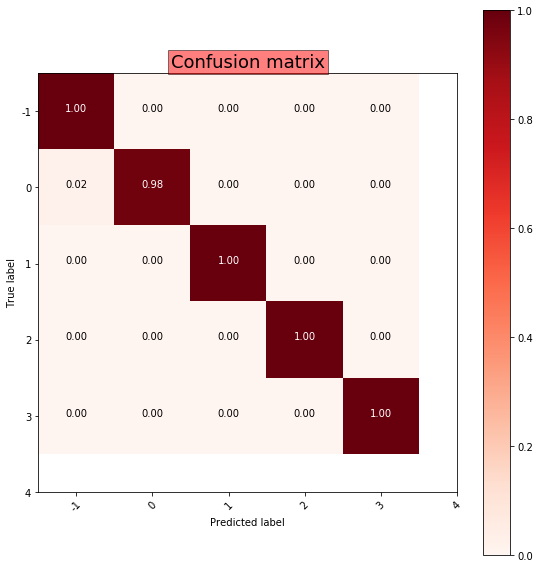

In [0]:
# Gradient Boosting (target variable: Customer_Category_dbsc5 )with hard upsampling

df_majority = df_customers[(df_customers.Customer_Category_dbsc5!=-1.0)]
df_minority = df_customers[(df_customers.Customer_Category_dbsc5==-1.0)]
 
# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=1302,
                                 random_state=40)
 
# Combine majority class with upsampled minority class
df_upsampled_dbsc5 = pd.concat([df_majority, df_minority_upsampled])

# Training set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_dbsc5, y_dbsc5, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled_dbsc5.as_matrix(df_upsampled_dbsc5.columns[0:13])
y = df_upsampled_dbsc5.as_matrix([df_upsampled_dbsc5.columns[16]])

# training set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)

gbc_ups_dbsc5 = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=4,
                                 min_samples_leaf=3, max_features=3, learning_rate=0.1)
gbc_ups_dbsc5.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc_ups_dbsc5.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)

print("accuracy score (with upsampling): %.4f" % accuracy)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

In [0]:
print(df_customers['Count_Invoices'].loc[df_customers['Count_Invoices']<5.0].count())
df_customers['Count_Invoices'].loc[df_customers['Count_Invoices']>=5.0].count()

3222


1114

# Evaluation

accuracy score (consumers who have made less than 5 purchases on the website): 0.9897
accuracy score (consumers who have made more than 5 purchases on the website): 0.9874


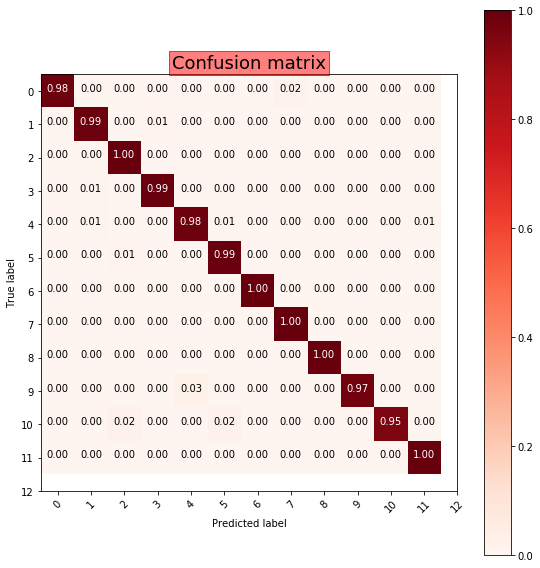

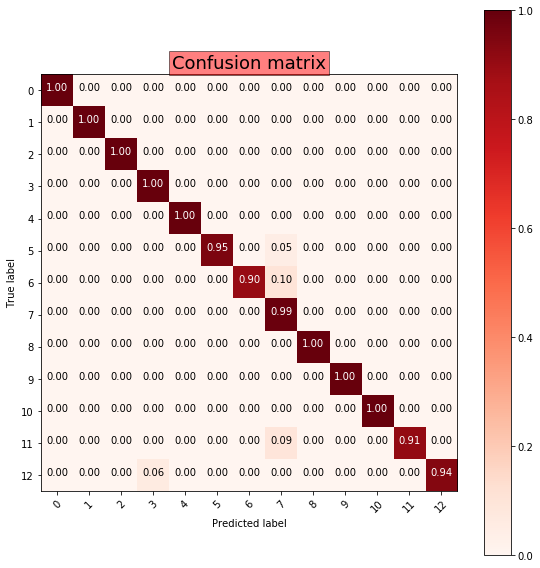

In [0]:
# Evaluation of the Gradient Boosting model (target variable: Customer_Category_km13)
# with a hard upsampling, depending on the number of transactions (important (> 5) and the others)

X_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
    df_customers.columns[0:13])
X_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    df_customers.columns[0:13])

y_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
    [df_customers.columns[14]])
y_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    [df_customers.columns[14]])

# Validation set for the consumers who have made more than 5 purchases on the website
X_train, X_validation_high, y_train, y_validation_high = train_test_split(
    X_count_high, y_count_high, test_size=0.5,train_size=0.5, random_state=40)

# Validation set for the consumers who have made less than 5 purchases on the website
X_train, X_validation_low, y_train, y_validation_low = train_test_split(
    X_count_low, y_count_low, test_size=0.3,train_size=0.7, random_state=40)

y_pred_low = gbc_ups_km13.predict(X_validation_low)
accuracy_low = accuracy_score(y_validation_low, y_pred_low)

y_pred_high = gbc_ups_km13.predict(X_validation_high)
accuracy_high = accuracy_score(y_validation_high, y_pred_high)

print("accuracy score (consumers who have made less than 5 purchases on the website): %.4f" % accuracy_low)
print("accuracy score (consumers who have made more than 5 purchases on the website): %.4f" % accuracy_high)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation_low, y_pred_low)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

cnf_matrix = confusion_matrix(y_validation_high, y_pred_high)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

accuracy score (consumers who have made less than 5 purchases on the website): 0.9886
accuracy score (consumers who have made more than 5 purchases on the website): 0.9987


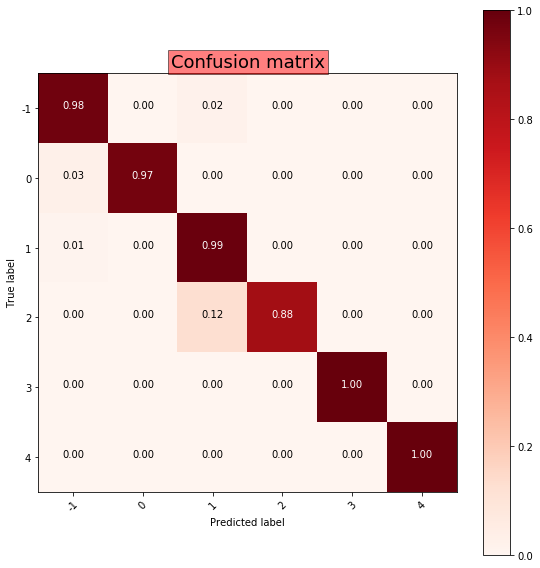

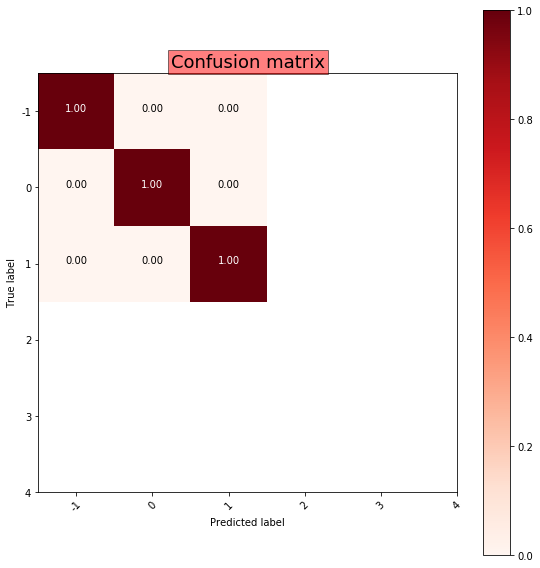

In [0]:
# Evaluation of the Gradient Boosting model (target variable: Customer_Category_dbsc5)
# with a hard upsampling, depending on the number of transactions (important (> 5) and the others)

X_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
    df_customers.columns[0:13])
X_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    df_customers.columns[0:13])

y_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
   [df_customers.columns[16]])
y_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    [df_customers.columns[16]])

# Validation set for the consumers who have made more than 5 purchases on the website
X_train, X_validation_high, y_train, y_validation_high = train_test_split(
    X_count_high, y_count_high, test_size=0.7, train_size=0.3, random_state=40)

# Validation set for the consumers who have made less than 5 purchases on the website
X_train, X_validation_low, y_train, y_validation_low = train_test_split(
    X_count_low, y_count_low, test_size=0.3,train_size=0.7, random_state=40)

y_pred_low = gbc_ups_dbsc5.predict(X_validation_low)
accuracy_low = accuracy_score(y_validation_low, y_pred_low)

y_pred_high = gbc_ups_dbsc5.predict(X_validation_high)
accuracy_high = accuracy_score(y_validation_high, y_pred_high)

print("accuracy score (consumers who have made less than 5 purchases on the website): %.4f" % accuracy_low)
print("accuracy score (consumers who have made more than 5 purchases on the website): %.4f" % accuracy_high)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation_low, y_pred_low)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

cnf_matrix = confusion_matrix(y_validation_high, y_pred_high)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

In [0]:
# Evaluation of our 2 best models on the test set

y_pred_km13 = gbc_ups_km13.predict(X_test_km13)
accuracy_km13 = accuracy_score(y_test_km13, y_pred_km13)

y_pred_dbsc5 = gbc_ups_dbsc5.predict(X_test_dbsc5)
accuracy_dbsc5 = accuracy_score(y_test_dbsc5, y_pred_dbsc5)

print("accuracy score of the Gradient Boosting model (target variable:"
      "Customer_Category_km13) with a hard upsampling on the test set: %.4f" % accuracy_km13)
print("accuracy score of the Gradient Boosting model (target variable:"
      "Customer_Category_dbsc5) with a hard upsampling on the test set: %.4f" % accuracy_dbsc5)


accuracy score of the Gradient Boosting model (target variable:Customer_Category_km13) with a hard upsampling on the test set: 0.9871
accuracy score of the Gradient Boosting model (target variable:Customer_Category_dbsc5) with a hard upsampling on the test set: 0.9926


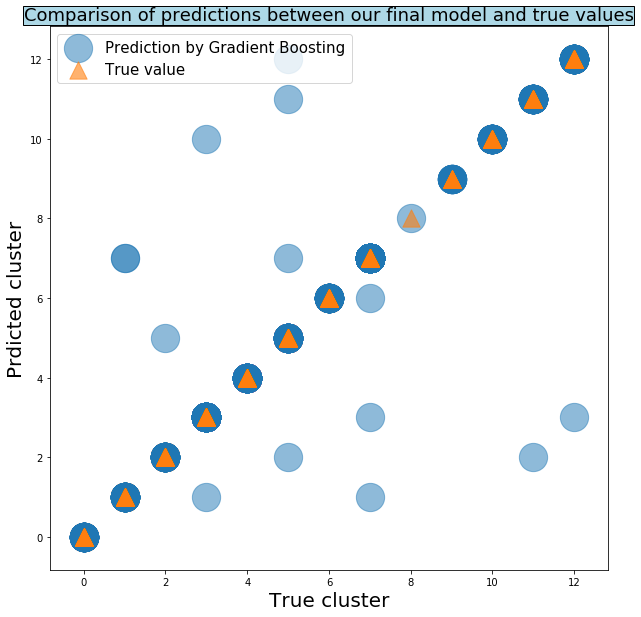

In [0]:
# Display the classification prediction on the test set for the model:
# Gradient Boosting (target variable:Customer_Category_km13 ) with a hard upsampling

plt.figure(figsize=(10,10))

plt.title("Comparison of predictions between our final model and true values", 
          bbox={"pad":0.5, "facecolor":'lightblue'}, size=18)
plt.scatter(y_test_km13, y_pred_km13, s=800, alpha=0.5)
plt.scatter(y_test_km13, y_test_km13, marker='^', s=300, alpha=0.6)
plt.ylabel("Prdicted cluster", size=20)
plt.xlabel("True cluster", size=20)
plt.legend(["Prediction by Gradient Boosting","True value"], fontsize=15,
           loc='upper left')
plt.show()